# Load candidates

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:

CACHE = '/home/anhphantq/vdb/cache_train_test'
import os

import pickle
from tqdm import tqdm
train_data = []
num_cands = []

with open(CACHE + '/metadata', 'rb') as f:
  metadata = pickle.load(f)

num_frags = metadata['num_frags']
max_session = metadata['max_session']

for i in tqdm(range(num_frags)):
    with open(CACHE + f'/test_train_data_{i}', 'rb') as f:
      data = pickle.load(f)
      train_data.extend(data[0])
      num_cands.extend(data[1])






100%|██████████| 380/380 [00:08<00:00, 43.51it/s]


In [3]:
import numpy as np
train_data = np.concatenate(train_data)
num_cands = np.concatenate(num_cands)
train_data.shape, num_cands.shape

((5210472, 78), (5210472,))

In [4]:
from xgb_utils import create_test_data

In [5]:
train_data.shape

(5210472, 78)

In [6]:
import pandas as pd 

candidates = create_test_data(train_data, infer = False, max_session=max_session)


In [7]:
del train_data

In [8]:
import pandas as pd
pd.set_option('display.max_columns', candidates.shape[1])

In [9]:
candidates  


,user,item,fitness,inter_clicks,inter_carts,inter_orders,inter_num_sub,inter_time_decay,inter_lts,inter_fts,inter_durability,inter_num_interacts,num_sub,consistency,num_actions,user_degree,user_pr,user_recent_degree,user_recent_pr,num_clicks,num_carts,num_orders,item_degree,item_pr,recent_num_clicks,recent_num_carts,recent_num_orders,item_recent_degree,item_recent_pr,recent_day7_type0,recent_day7_type1,recent_day7_type2,recent_day6_type0,recent_day6_type1,recent_day6_type2,recent_day5_type0,recent_day5_type1,recent_day5_type2,recent_day4_type0,recent_day4_type1,recent_day4_type2,recent_day3_type0,recent_day3_type1,recent_day3_type2,recent_day2_type0,recent_day2_type1,recent_day2_type2,recent_day1_type0,recent_day1_type1,recent_day1_type2,item_glob_last_action,item_glob_first_action,item_glob_time_decay_sum,item_glob_time_decay_sum_click,item_glob_time_decay_sum_cart,item_glob_time_decay_sum_order,item_glob_item_glob_durability,recent_inter_day7_type0,recent_inter_day7_type1,recent_inter_day7_type2,recent_inter_day6_type0,recent_inter_day6_type1,recent_inter_day6_type2,recent_inter_day5_type0,recent_inter_day5_type1,recent_inter_day5_type2,recent_inter_day4_type0,recent_inter_day4_type1,recent_inter_day4_type2,recent_inter_day3_type0,recent_inter_day3_type1,recent_inter_day3_type2,recent_inter_day2_type0,recent_inter_day2_type1,recent_inter_day2_type2,recent_inter_day1_type0,recent_inter_day1_type1,recent_inter_day1_type2
0,11461244.0,526157.0,5.000000,1.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.0,1.0,3.0,0.072598,7.0,7.0,3.800492e-08,7.0,7.849568e-08,821.0,11.0,2.0,577.0,0.000003,385.0,5.0,1.0,260.0,0.000003,49.0,0.0,0.0,35.0,0.0,0.0,49.0,1.0,0.0,34.0,2.0,1.0,43.0,0.0,0.0,67.0,1.0,0.0,39.0,0.0,0.0,20.990162,0.348287,368.334616,362.289251,5.040815,1.004550,20.641875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11461244.0,846423.0,4.997871,1.0,0.0,0.0,1.0,0.999574,0.999385,0.999385,0.0,1.0,3.0,0.072598,7.0,7.0,3.800492e-08,7.0,7.849568e-08,745.0,19.0,7.0,522.0,0.000002,304.0,10.0,5.0,200.0,0.000002,48.0,1.0,1.0,32.0,0.0,0.0,34.0,2.0,0.0,32.0,0.0,0.0,35.0,3.0,0.0,32.0,0.0,0.0,42.0,1.0,1.0,20.941100,0.009421,321.206839,311.095775,7.519461,2.591604,20.931678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,11461244.0,277807.0,4.996281,1.0,0.0,0.0,1.0,0.999256,0.998927,0.998927,0.0,1.0,3.0,0.072598,7.0,7.0,3.800492e-08,7.0,7.849568e-08,3177.0,140.0,39.0,1751.0,0.000008,1454.0,73.0,20.0,755.0,0.000008,140.0,5.0,2.0,167.0,6.0,0.0,144.0,3.0,3.0,170.0,10.0,2.0,151.0,5.0,1.0,158.0,5.0,0.0,154.0,7.0,2.0,20.983009,0.006620,1330.831106,1268.870383,49.525518,12.435205,20.976389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,11461244.0,1782334.0,4.987357,0.0,1.0,0.0,1.0,0.623420,0.318275,0.318275,0.0,1.0,3.0,0.072598,7.0,7.0,3.800492e-08,7.0,7.849568e-08,4315.0,1272.0,165.0,3005.0,0.000015,1817.0,603.0,90.0,1133.0,0.000013,211.0,76.0,14.0,211.0,73.0,12.0,216.0,57.0,7.0,185.0,61.0,7.0,169.0,56.0,10.0,156.0,55.0,4.0,209.0,62.0,10.0,20.995116,0.000046,2299.581311,1712.758194,515.927922,70.895195,20.995069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11461244.0,1455357.0,4.943415,1.0,0.0,0.0,1.0,0.988683,0.983580,0.983580,0.0,1.0,3.0,0.072598,7.0,7.0,3.800492e-08,7.0,7.849568e-08,6071.0,333.0,99.0,3004.0,0.000014,2887.0,187.0,51.0,1305.0,0.000014,332.0,26.0,4.0,298.0,18.0,4.0,282.0,14.0,7.0,271.0,19.0,6.0,288.0,23.0,1.0,250.0,11.0,7.0,329.0,19.0,5.0,20.983657,0.010914,2640.596533,2460.116022,141.663209,38.817303,20.972743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [10]:
len(candidates.columns)

78

# Train params

In [11]:
PARAMS = {
    'eta': 0.3,
    'min_child_weight': 1000,
    'num_parallel_tree': 1,
    'tree_method': 'hist',
    'max_bin': 256,
    'objective':'rank:pairwise',   
    'colsample_bytree': 0.9497036,
    'subsample': 0.8715623,
    'max_depth': 6,
    'reg_alpha': 0.041545473,
    'reg_lambda': 0.0735294,
    'gamma': 0.0222415,
}
N_SPLITS = 5
NUM_TREE = 1000
MODEL_PATH = '/home/anhphantq/xgboost_test'
VERSION = '9'

# Train for each type

In [12]:
from xgb_utils import get_len_group

In [13]:
import pandas as pd 
import numpy as np
tar = pd.read_parquet('/home/anhphantq/otto/splitted_data/test_labels.parquet')
tar = tar.loc[(tar['session'] <= candidates['user'].max()) & (tar['session'] >= candidates['user'].min()) ]
aids = tar.ground_truth.explode().astype('int32').rename('item')
tar = tar[['session', 'type']].rename({'session':'user'},axis=1)
tar = tar.merge(aids, left_index=True, right_index=True, how='left')
tar['type'] = tar['type'].apply(lambda x: 0 if x == 'clicks' else 1 if x == 'carts' else 2)
tar['label'] = 1

In [14]:
tar

,user,type,item,label
113400,11188590,0,607328,1
113401,11188591,0,557157,1
113402,11188591,1,1597320,1
113402,11188591,1,1236555,1
113402,11188591,1,970284,1
...,...,...,...,...
2212687,12899774,0,1399483,1
2212688,12899775,0,1760714,1
2212689,12899776,0,1737908,1
2212690,12899777,0,384045,1


In [15]:
candidates

,user,item,fitness,inter_clicks,inter_carts,inter_orders,inter_num_sub,inter_time_decay,inter_lts,inter_fts,inter_durability,inter_num_interacts,num_sub,consistency,num_actions,user_degree,user_pr,user_recent_degree,user_recent_pr,num_clicks,num_carts,num_orders,item_degree,item_pr,recent_num_clicks,recent_num_carts,recent_num_orders,item_recent_degree,item_recent_pr,recent_day7_type0,recent_day7_type1,recent_day7_type2,recent_day6_type0,recent_day6_type1,recent_day6_type2,recent_day5_type0,recent_day5_type1,recent_day5_type2,recent_day4_type0,recent_day4_type1,recent_day4_type2,recent_day3_type0,recent_day3_type1,recent_day3_type2,recent_day2_type0,recent_day2_type1,recent_day2_type2,recent_day1_type0,recent_day1_type1,recent_day1_type2,item_glob_last_action,item_glob_first_action,item_glob_time_decay_sum,item_glob_time_decay_sum_click,item_glob_time_decay_sum_cart,item_glob_time_decay_sum_order,item_glob_item_glob_durability,recent_inter_day7_type0,recent_inter_day7_type1,recent_inter_day7_type2,recent_inter_day6_type0,recent_inter_day6_type1,recent_inter_day6_type2,recent_inter_day5_type0,recent_inter_day5_type1,recent_inter_day5_type2,recent_inter_day4_type0,recent_inter_day4_type1,recent_inter_day4_type2,recent_inter_day3_type0,recent_inter_day3_type1,recent_inter_day3_type2,recent_inter_day2_type0,recent_inter_day2_type1,recent_inter_day2_type2,recent_inter_day1_type0,recent_inter_day1_type1,recent_inter_day1_type2
0,11461244.0,526157.0,5.000000,1.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.0,1.0,3.0,0.072598,7.0,7.0,3.800492e-08,7.0,7.849568e-08,821.0,11.0,2.0,577.0,0.000003,385.0,5.0,1.0,260.0,0.000003,49.0,0.0,0.0,35.0,0.0,0.0,49.0,1.0,0.0,34.0,2.0,1.0,43.0,0.0,0.0,67.0,1.0,0.0,39.0,0.0,0.0,20.990162,0.348287,368.334616,362.289251,5.040815,1.004550,20.641875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11461244.0,846423.0,4.997871,1.0,0.0,0.0,1.0,0.999574,0.999385,0.999385,0.0,1.0,3.0,0.072598,7.0,7.0,3.800492e-08,7.0,7.849568e-08,745.0,19.0,7.0,522.0,0.000002,304.0,10.0,5.0,200.0,0.000002,48.0,1.0,1.0,32.0,0.0,0.0,34.0,2.0,0.0,32.0,0.0,0.0,35.0,3.0,0.0,32.0,0.0,0.0,42.0,1.0,1.0,20.941100,0.009421,321.206839,311.095775,7.519461,2.591604,20.931678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,11461244.0,277807.0,4.996281,1.0,0.0,0.0,1.0,0.999256,0.998927,0.998927,0.0,1.0,3.0,0.072598,7.0,7.0,3.800492e-08,7.0,7.849568e-08,3177.0,140.0,39.0,1751.0,0.000008,1454.0,73.0,20.0,755.0,0.000008,140.0,5.0,2.0,167.0,6.0,0.0,144.0,3.0,3.0,170.0,10.0,2.0,151.0,5.0,1.0,158.0,5.0,0.0,154.0,7.0,2.0,20.983009,0.006620,1330.831106,1268.870383,49.525518,12.435205,20.976389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,11461244.0,1782334.0,4.987357,0.0,1.0,0.0,1.0,0.623420,0.318275,0.318275,0.0,1.0,3.0,0.072598,7.0,7.0,3.800492e-08,7.0,7.849568e-08,4315.0,1272.0,165.0,3005.0,0.000015,1817.0,603.0,90.0,1133.0,0.000013,211.0,76.0,14.0,211.0,73.0,12.0,216.0,57.0,7.0,185.0,61.0,7.0,169.0,56.0,10.0,156.0,55.0,4.0,209.0,62.0,10.0,20.995116,0.000046,2299.581311,1712.758194,515.927922,70.895195,20.995069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11461244.0,1455357.0,4.943415,1.0,0.0,0.0,1.0,0.988683,0.983580,0.983580,0.0,1.0,3.0,0.072598,7.0,7.0,3.800492e-08,7.0,7.849568e-08,6071.0,333.0,99.0,3004.0,0.000014,2887.0,187.0,51.0,1305.0,0.000014,332.0,26.0,4.0,298.0,18.0,4.0,282.0,14.0,7.0,271.0,19.0,6.0,288.0,23.0,1.0,250.0,11.0,7.0,329.0,19.0,5.0,20.983657,0.010914,2640.596533,2460.116022,141.663209,38.817303,20.972743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [16]:
import xgboost as xgb
from sklearn.model_selection import GroupKFold
import os
import shutil
import matplotlib.pyplot as plt
def train(tar_, candidates_, t, num_cands, id_type):
  name = f'/{t}_only_'
  try:
    shutil.rmtree(MODEL_PATH + name + VERSION)
  except:
    pass
  else:
    print('remove old version')
  
  tar = tar_[tar_['type'] == id_type].copy()
  candidates = candidates_.copy()
  candidates['type'] = id_type
  
  candidates['user_type'] = candidates['user'] * 10 + candidates['type']
  tar['user_type'] = tar['user'] * 10 + tar['type']
  del tar['type'], tar['user']
  candidates = candidates.merge(tar,on=['user_type','item'],how='left').fillna(0)
  candidates['label'] = candidates['label'].values.astype(np.int16)

  # neg_idx = np.argwhere(candidates['label'].values.flatten() == 0)
  # neg_idx = np.random.permutation(neg_idx)[: int(len(neg_idx) * 0.5)]
  # candidates = candidates.drop(neg_idx.flatten()).reset_index()
  # num_cands = candidates[['user', 'item']].groupby('user').count().reset_index()
  # num_cands['num_cands'] = num_cands['item']
  # del num_cands['item'] 
  # candidates = candidates.merge(num_cands,on=['user'],how='left')
  # num_cands = candidates['num_cands'].values


  print(np.sum(candidates['label']), candidates.shape[0])
  
  del candidates['type'], candidates['user_type']

  skf = GroupKFold(n_splits=N_SPLITS)
  fig, axs = plt.subplots(1,N_SPLITS, figsize = (N_SPLITS * 10, 10))
  for fold,(train_idx, valid_idx) in enumerate(skf.split(candidates, candidates['label'], groups=candidates['user'] )):

      X_train = candidates.iloc[train_idx, 2 : -1]
      y_train = candidates.iloc[train_idx, -1]
      X_valid = candidates.iloc[valid_idx, 2 : -1]
      y_valid = candidates.iloc[valid_idx, -1]

      dtrain = xgb.DMatrix(X_train, y_train, nthread = os.cpu_count() ) 
      dtrain.set_group(get_len_group(train_idx, num_cands))
      dvalid = xgb.DMatrix(X_valid, y_valid, nthread = os.cpu_count() ) 
      dvalid.set_group(get_len_group(valid_idx, num_cands))
      
      xgb_parms = {'objective':'rank:pairwise', 'nthread' : os.cpu_count(),
      **PARAMS}
      model = xgb.train(xgb_parms, 
          dtrain=dtrain,
          evals=[(dtrain,'train'),(dvalid,'valid')],
          num_boost_round=NUM_TREE,
          verbose_eval=5,
          early_stopping_rounds= 30, )
      try:
        os.mkdir(MODEL_PATH + name + VERSION)
      except:
        pass
      model.save_model(MODEL_PATH + name + VERSION + f'/XGB_fold{fold}.xgb')
      xgb.plot_importance(model, ax = axs[fold], max_num_features= 50, importance_type= 'gain')

remove old version
540558 5210472
[0]	train-map:0.95454	valid-map:0.95482
[5]	train-map:0.95541	valid-map:0.95560
[10]	train-map:0.95606	valid-map:0.95623
[15]	train-map:0.95640	valid-map:0.95659
[20]	train-map:0.95661	valid-map:0.95681
[25]	train-map:0.95681	valid-map:0.95693
[30]	train-map:0.95693	valid-map:0.95696
[35]	train-map:0.95698	valid-map:0.95698
[40]	train-map:0.95703	valid-map:0.95702
[45]	train-map:0.95706	valid-map:0.95707
[50]	train-map:0.95712	valid-map:0.95709
[55]	train-map:0.95717	valid-map:0.95711
[60]	train-map:0.95723	valid-map:0.95712
[65]	train-map:0.95731	valid-map:0.95718
[70]	train-map:0.95736	valid-map:0.95725
[75]	train-map:0.95742	valid-map:0.95731
[80]	train-map:0.95743	valid-map:0.95729
[85]	train-map:0.95748	valid-map:0.95730
[90]	train-map:0.95754	valid-map:0.95735
[95]	train-map:0.95756	valid-map:0.95733
[100]	train-map:0.95766	valid-map:0.95738
[105]	train-map:0.95770	valid-map:0.95741
[110]	train-map:0.95772	valid-map:0.95741
[115]	train-map:0.9577

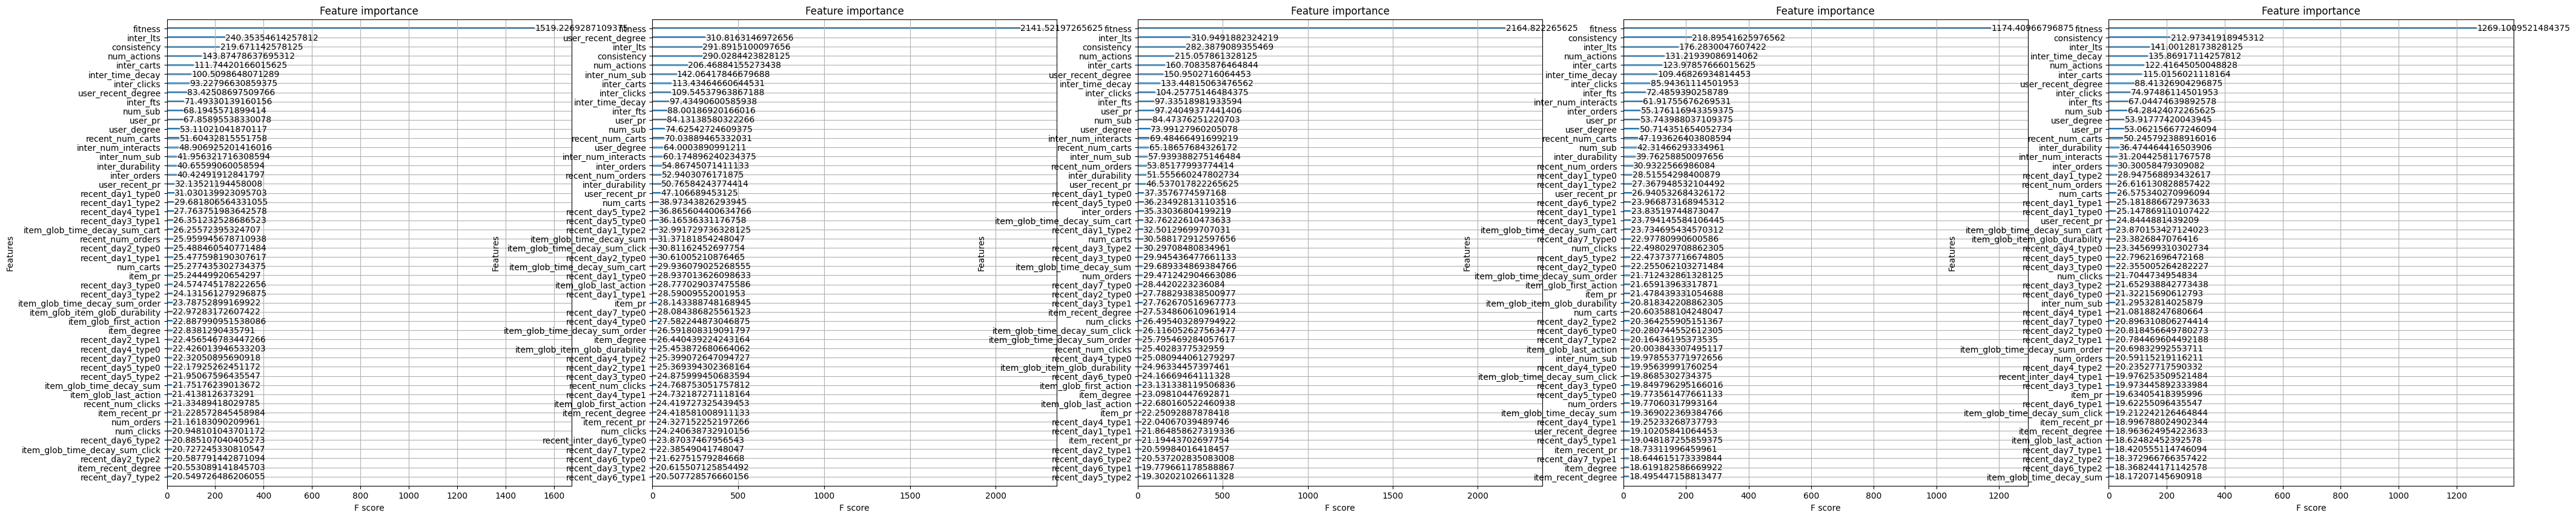

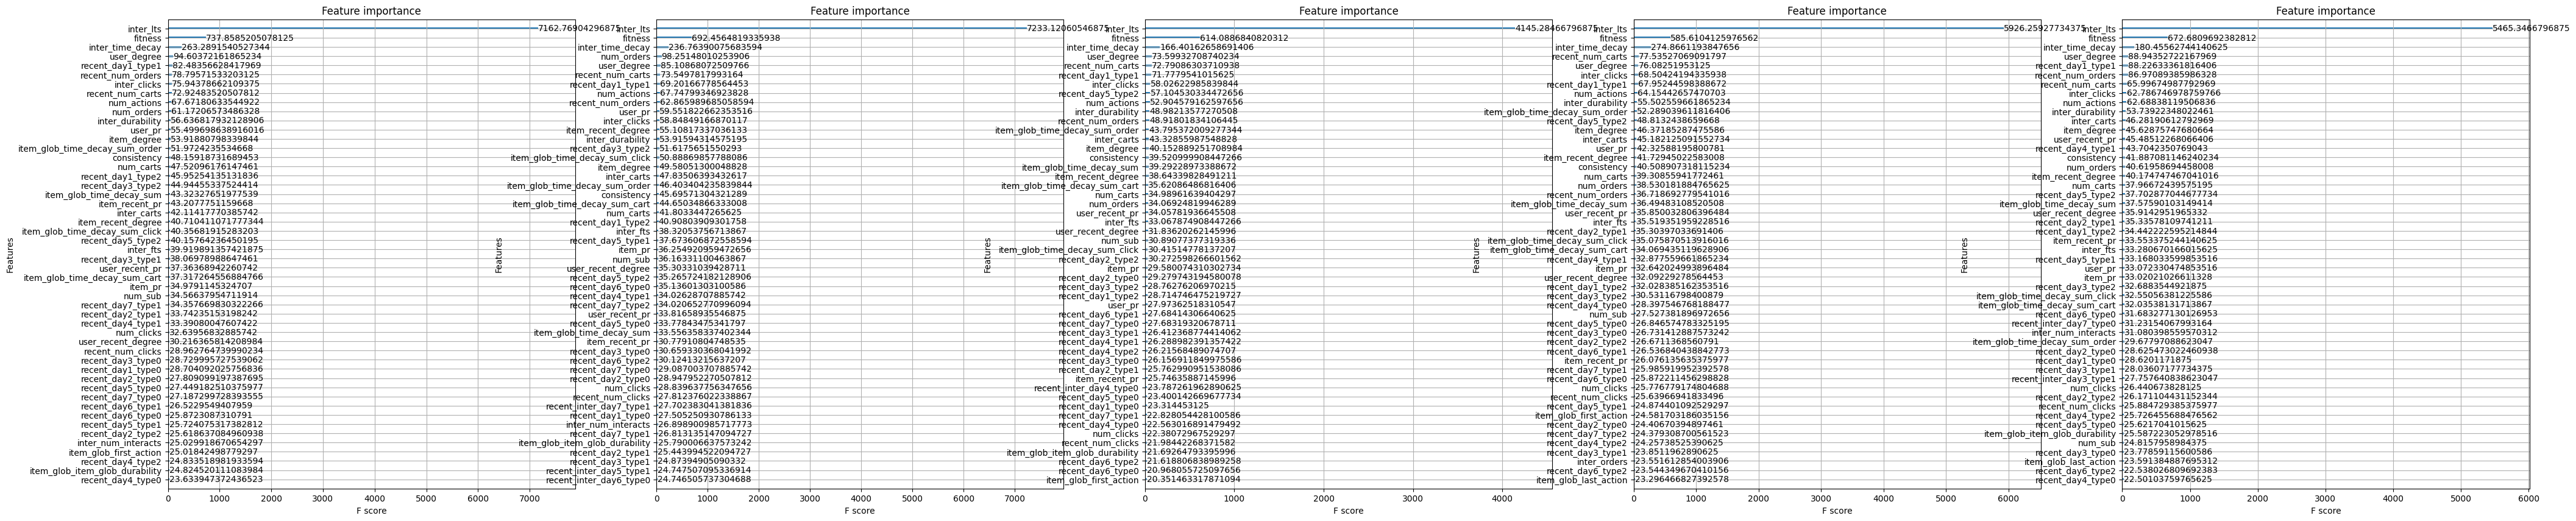

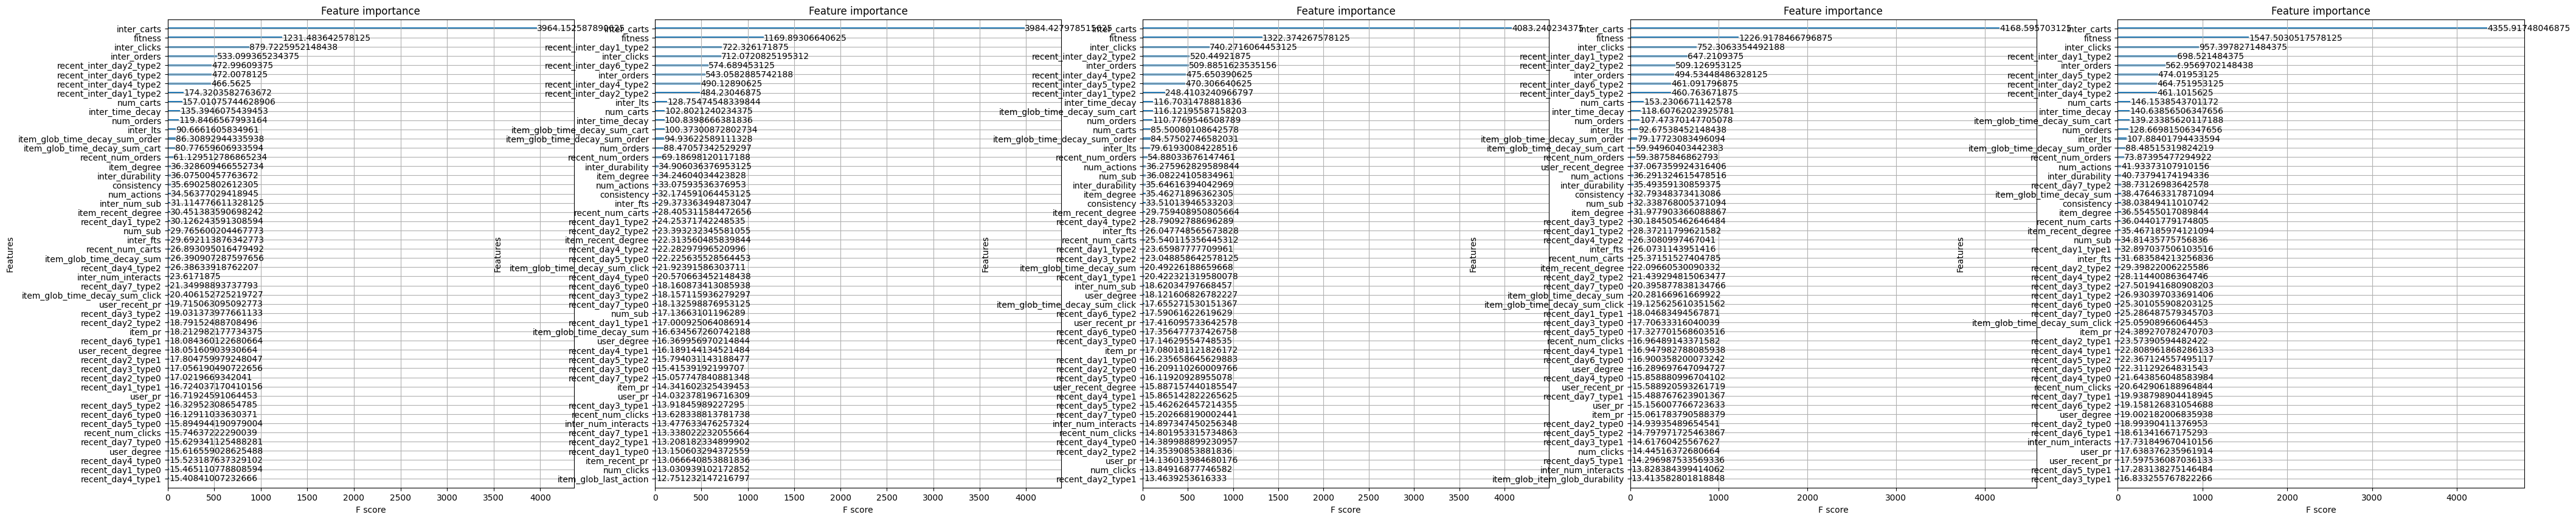

In [17]:
%%time
for id_type, t in enumerate(['clicks', 'carts', 'orders']):
  train(tar, candidates, t, num_cands, id_type)